<h1> Simulation I</h1>

To generate random numbers to match the known distribution is not difficult in python. For example, if we want to generate a discrete number with distribution:
<pre>
1 0.1
2 0.05
3 0.05
4 0.2
5 0.4
6 0.2
</pre>

In [24]:
import time
#from mylib import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import random 

### warm-up: three door issue
The "three door issue" is often referred to as the "Monty Hall problem," a probability puzzle based on a game show scenario. Here's a brief overview of the problem:

1. Setup: You are presented with three doors. Behind one door is a car (the prize you want), and behind the other two doors are goats (which you do not want).

2. Initial Choice: You choose one door, say Door 1.

3. Host Action: The host, who knows what is behind each door, opens one of the other two doors, revealing a goat. For example, if you chose Door 1, the host might open Door 3, showing a goat.

4. Final Decision: You are then given the option to either stick with your original choice (Door 1) or switch to the remaining unopened door (Door 2).

Question: do you switch the door?

In [2]:
 

def monty_hall_simulation(num_trials):  
    stick_wins = 0  
    switch_wins = 0  

    for _ in range(num_trials):  
        # Step 1: Randomly place the car behind one of the doors  
        doors = ['goat', 'goat', 'car']  
        random.shuffle(doors)  

        # Step 2: Contestant makes an initial choice  
        contestant_choice = random.randint(0, 2)  

        # Step 3: Host opens a door that has a goat and is not the contestant's choice  
        for i in range(3):
            if i != contestant_choice and doors[i] == 'goat':
                host_choice = i

        # Step 4: Determine the remaining door 
        for i in range(3):
             if i != contestant_choice and i != host_choice:
                    remaining_door = i
        
        # Step 5: Check if sticking wins  
        if doors[contestant_choice] == 'car':  
            stick_wins += 1  

        # Step 6: Check if switching wins  
        if doors[remaining_door] == 'car':  
            switch_wins += 1  

    return stick_wins, switch_wins  

# Run the simulation  
num_trials = 300
stick_wins, switch_wins = monty_hall_simulation(num_trials)  

print(f"Out of {num_trials} trials:")  
print(f"Winning by sticking with the original choice: {stick_wins} times ({stick_wins / num_trials * 100:.2f}%)")  
print(f"Winning by switching: {switch_wins} times ({switch_wins / num_trials * 100:.2f}%)")

Out of 300 trials:
Winning by sticking with the original choice: 107 times (35.67%)
Winning by switching: 193 times (64.33%)


0.014983892440795898


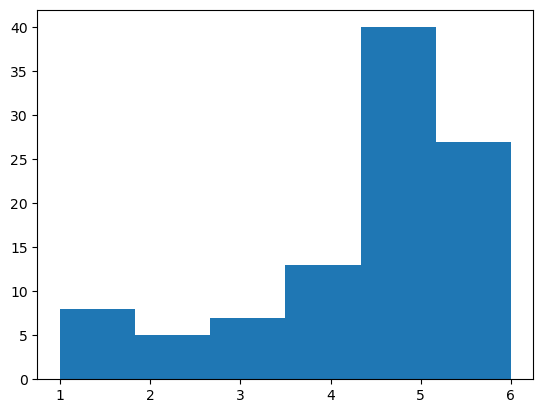

In [3]:
t0=time.time()
rs=[np.random.choice(np.arange(1, 7),p=[0.1, 0.05, 0.05, 0.2, 0.4, 0.2]) #按概率生成整数
    for i in range(100)]
print(time.time()-t0)
plt.hist(rs,bins=6)
plt.show()

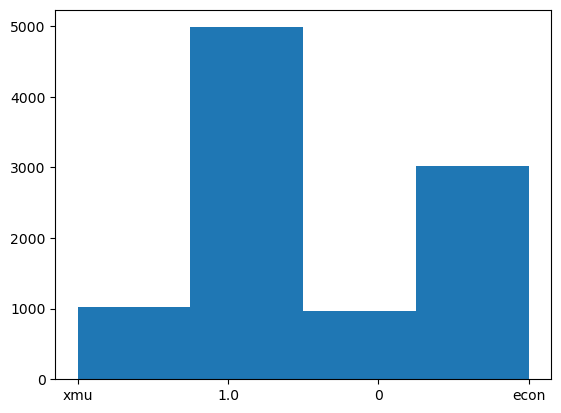

In [27]:
res = [np.random.choice([0,1.0,"econ",'xmu'],
                        p=[0.1,0.5,0.3,0.1]) for i in range(10000)]
plt.hist(res,bins=4)
plt.show()

In [9]:
rs=[np.random.choice(np.arange(1, 7), 
    p=[0.1, 0.05, 0.05, 0.2, 0.4, 0.2]) 
    for i in range(100)]
pdf=[0.1, 0.05, 0.05, 0.2, 0.4, 0.2]
cdf=np.cumsum(pdf)
cdf
#help(np.cumsum)

array([0.1 , 0.15, 0.2 , 0.4 , 0.8 , 1.  ])

0.0023059844970703125


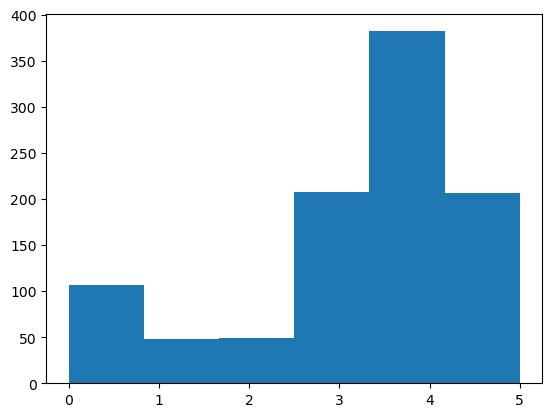

In [30]:
### homework ### generate a random variable with given dist.
def empirical(cdf):
    r=np.random.random() #用于生成一个 0 到 1 之间的随机浮点数。
    k=0
    for x in cdf:
        if r<x: #如果生成的随机数小于这个cdf的数，就返回k
            #print(r, k)
            return k
        k+=1

t0=time.time()
rrs=[empirical(cdf) for i in range(1000)]
print(time.time()-t0)

plt.hist(rrs,bins=6)
plt.show()

<h2>Empirical Distribution</h2>

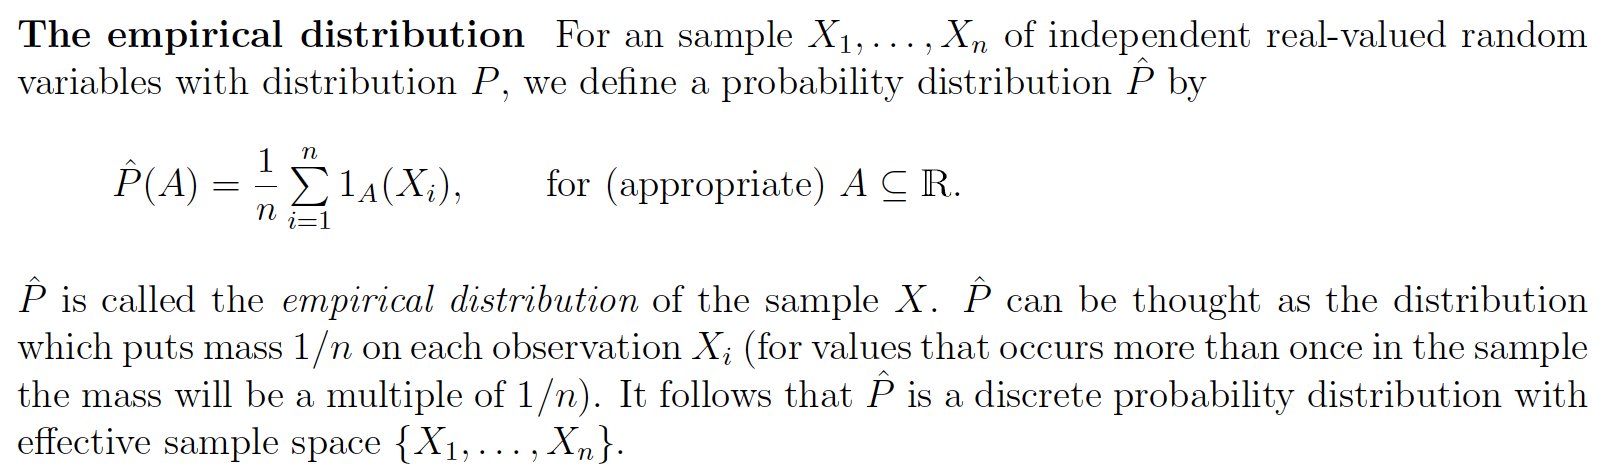

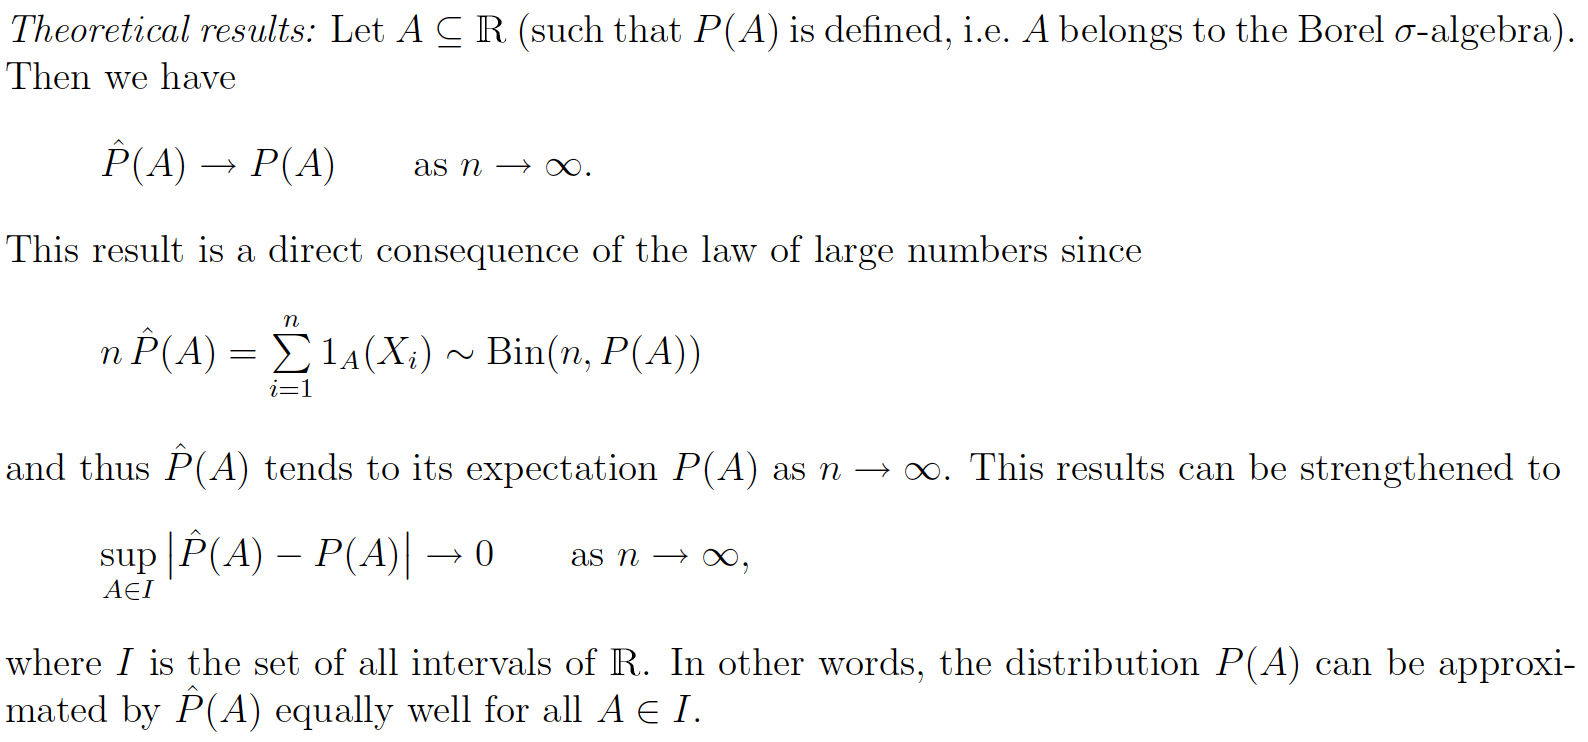

In [31]:
n = 100000
XX = np.random.random(size=n)
print(XX[:5])
np.sum(XX < 0.3)/n

[0.92685212 0.9969716  0.19903743 0.85505809 0.27375541]


0.29844

[   10  1010  2010  3010  4010  5010  6010  7010  8010  9010 10010 11010
 12010 13010 14010 15010 16010 17010 18010 19010 20010 21010 22010 23010
 24010 25010 26010 27010 28010 29010 30010 31010 32010 33010 34010 35010
 36010 37010 38010 39010 40010 41010 42010 43010 44010 45010 46010 47010
 48010 49010 50010 51010 52010 53010 54010 55010 56010 57010 58010 59010
 60010 61010 62010 63010 64010 65010 66010 67010 68010 69010 70010 71010
 72010 73010 74010 75010 76010 77010 78010 79010 80010 81010 82010 83010
 84010 85010 86010 87010 88010 89010 90010 91010 92010 93010 94010 95010
 96010 97010 98010 99010]


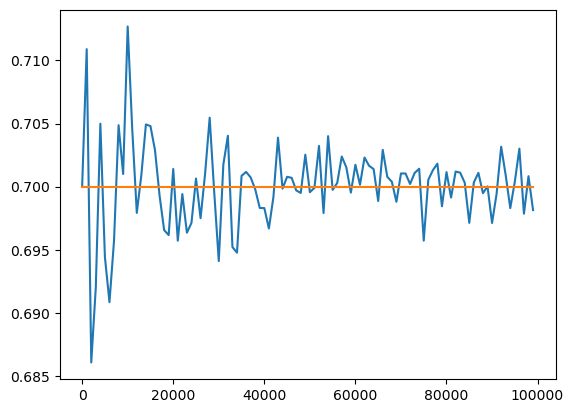

In [20]:
# uniform distribution
ftn = lambda n,x=0.5: np.sum(np.random.random(size=n) < x)/n 
x = 0.7
seq = np.arange(10,100000,1000)
print(seq)
res = [ftn(n,x) for n in seq]
plt.plot(seq,res)
plt.plot(seq,x*np.ones(len(seq)))

0.5


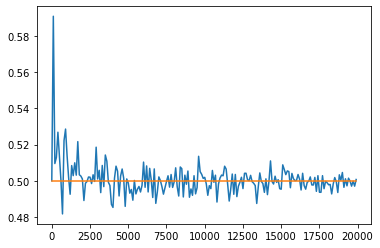

In [16]:
# normal distribution
ftn = lambda n,x=0.0: np.sum(np.random.normal(size=n) < x)/n 
seq = np.arange(10,20000,100)
x=0
res = [ftn(n,x) for n in seq]
prob = norm.cdf(x)
print(prob)
plt.plot(seq,res)
plt.plot(seq,prob*np.ones(len(seq)))

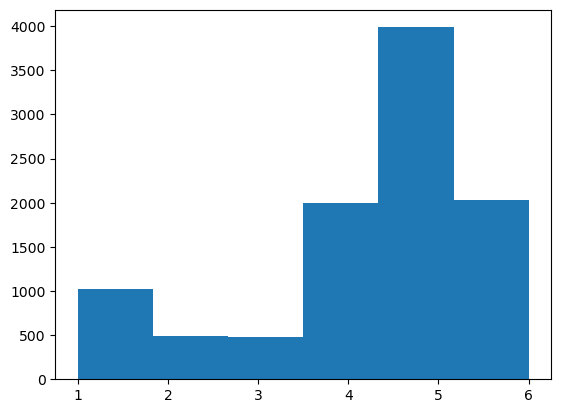

In [32]:
# discrete distribution
n = 10000
k=6
p=[0.1, 0.05, 0.05, 0.2, 0.4, 0.2]
rs=[np.random.choice(np.arange(1, k+1), p=p) for i in range(n)]
plt.hist(rs,bins=6)
plt.show()

In [18]:
rs.sort()
print(rs)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [19]:
rs.count(3)

444

In [20]:
dist = np.cumsum(p)
count = np.array([rs.count(i) for i in range(1,k+1)])
print(count)
pHat = count/count.sum()
distHat = pHat.cumsum()
distance = np.max(np.absolute(distHat-dist))
print(distance)

[ 997  498  444 1980 4004 2077]
0.008099999999999996


In [33]:
def ftn(n):
    rs=[np.random.choice(np.arange(1, k+1), p=p) for i in range(n)]
    rs.sort()
    count = np.array([rs.count(i) for i in range(1,k+1)])
    #从这些整数中随机选择一个数，选择时遵循概率分布 p（一个数组，定义每个值被选中的概率）。
    
    pHat = count/count.sum()
    distHat = pHat.cumsum()
    distance = np.max(np.absolute(dist - distHat))
    return distance

In [22]:
res = []
N = [50,100,200,400,800,1600,3200,10000,20000]
for n in N:
    res.append(ftn(n))
#print(res)
for i in zip(N,res):
    print(i)

(50, 0.10000000000000003)
(100, 0.04000000000000002)
(200, 0.04999999999999999)
(400, 0.012500000000000011)
(800, 0.0050000000000000044)
(1600, 0.016874999999999973)
(3200, 0.005624999999999991)
(10000, 0.005900000000000016)
(20000, 0.005099999999999993)


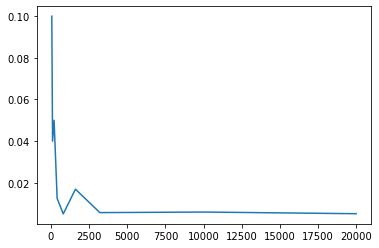

In [23]:
plt.plot(N,res)

Can you wrap them into a class?

In [34]:
class EmpCDF(object):
    def __init__(self,k):
        self.k = k
        p = np.random.random(size=k)
        self.p = p/p.sum()
        self.dist = self.p.cumsum()
    def genData(self,n):
        self.n = n
        rs=[np.random.choice(np.arange(1, self.k+1), p=self.p)
            for i in range(n)]
        self.data = rs
        return self.data
    def dist_hat(self):
        self.data.sort()
        #print(self.data)
        count = np.array([self.data.count(i) for i in range(1,self.k+1)])
        pHat = count/count.sum()
        self.distHat = pHat.cumsum()
    def distance(self):
        self.distance = np.max(np.absolute(self.dist - self.distHat))
        return self.distance  

In [35]:
temp = EmpCDF(100)
temp.genData(10000)
temp.dist_hat()
res = temp.distance()
temp.dist
print(res)

0.008703289526767688


The meaning of the propability $P(|{P}_n(A)-P(A)|\ge\epsilon)$ 

In [38]:
# the meaning of probability
ftn = lambda i,x=0.0: np.sum(np.random.normal(size=i) < x)/i
x=0
N = 1000
n = 1000
res = [ftn(i,x) for i in [n for _ in range(N)]]# repeat the event for N times
prob = norm.cdf(x)  #用于计算给定值 x 对应的累积概率。它告诉我们在标准正态分布（均值为 0，标准差为 1）下，小于或等于 x 的概率是多少。
#plt.plot(range(N),res)
print(np.mean(np.abs(res-prob)>0.1))

0.0


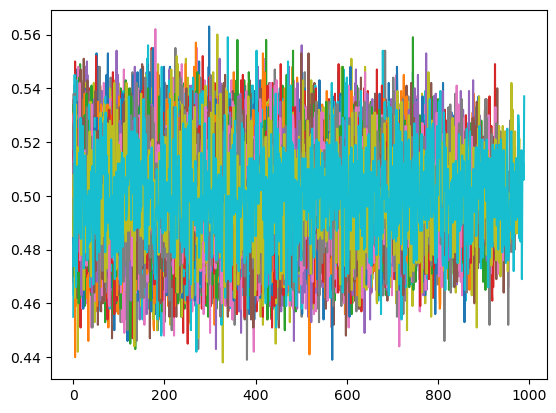

In [39]:
x = 0
p = []
seq = np.arange(100,1000,10)
for N in seq:
    res = [ftn(i,x) for i in [n for _ in range(N)]]# repeat the event for N times 有多少个小于x
    prob = norm.cdf(x)
    plt.plot(range(N),res)
    p.append(np.mean(np.abs(res-prob)>0.1))
    #print(np.mean(np.abs(res-prob)>0.1))

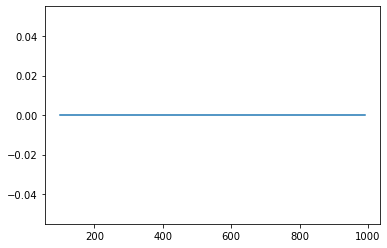

In [28]:
plt.plot(seq,p)

0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460685429
0.8413447460

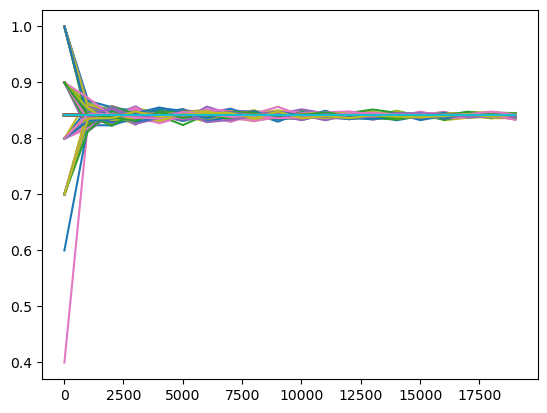

In [40]:
ftn = lambda n,x=0.0: np.sum(np.random.normal(size=n) < x)/n 
def bell():
    seq = np.arange(10,20000,1000)
    x=1
    res = [ftn(n,x) for n in seq]
    prob = norm.cdf(x)
    print(prob)
    plt.plot(seq,res)
    plt.plot(seq,prob*np.ones(len(seq)))
for i in range(100):
    bell()

## Sampling and Confidence intervals

What is the confidence interval?

The needs for getting confidence interval 
<ul>
<li>Confidence interval quantifies uncertainty of statistical estimation
<li>Confidence interval is the basis of parametric hypothesis tests
</ul>

In [43]:
import scipy.stats
alpha = 0.05
n = 1000
mu = 1.0
data = np.random.normal(mu,2,size=n)
x_bar = data.mean()
sigma_hat = data.std()
z_score = scipy.stats.t.ppf(q=1-alpha/2,df=n-1)
# scipy.stats.t：表示 SciPy 库中 t分布 的模块。
# .ppf：表示 百分位点函数（Percent Point Function），也称为 逆累积分布函数（Inverse CDF）。
# q=1 - alpha/2：指定所需的累积概率。
# df=n - 1：指定自由度（degrees of freedom）。
print(x_bar,sigma_hat,z_score)

0.9733158885103876 1.9719809460193307 1.9623414611334487


In [44]:
(x_bar-z_score*sigma_hat/np.sqrt(n)) <= mu and (mu <= x_bar+z_score*sigma_hat/np.sqrt(n))

True

In [45]:
class ConfNormal():
    def __init__(self,n,mu=2.0,sigma=4.0):
        self.n = n
        self.mu = mu
        self.sigma = sigma
        self.data = np.random.normal(mu,sigma,size=n)

    def confInterval(self,alpha=0.05):
        self.x_bar = self.data.mean()
        self.sigma_hat = self.data.std()
        z_score =  scipy.stats.t.ppf(q=1-alpha/2,df=self.n-1)
        self.lower_bound = self.x_bar-z_score*self.sigma_hat/np.sqrt(self.n)
        self.upper_bound = self.x_bar+z_score*self.sigma_hat/np.sqrt(self.n)
        return [self.lower_bound,self.upper_bound]
    def yesOrNo(self):
        return (self.lower_bound <= self.mu) and (self.mu <= self.upper_bound)

temp = ConfNormal(n)
temp.confInterval(alpha=0.06)
temp.yesOrNo()
#.conf_interval(alpha=0.05)#.get_drop()

True

In [46]:
res = []
n = 1000
for i in range(1000):
    instance = ConfNormal(n)
    instance.confInterval(alpha=0.05)
    res.append(instance.yesOrNo())
np.mean(np.array(res))

0.95

- confidence interval for many other statistics cannot be analytically solved, simply because there are no formulas for them. If the statistic of your interest does not have an analytical solution for its confidence interval, or you simply don't know it, numerical methods like boostrapping can be a good alternative (and its powerful).

## Resampling

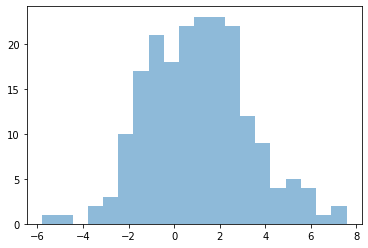

In [103]:
# polling from a normal distribution many times 
n=200
data=np.random.normal(1,2,n)
plt.hist(data, alpha=0.5, bins=20)
plt.show()

In [104]:
np.random.randint(0, 20, size=10)

array([17,  8,  3,  1, 17,  6, 11, 10, 18, 13])

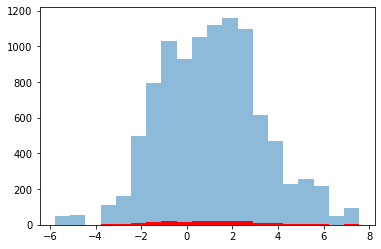

In [105]:
# by resampling the same data (BOOTSTRAPPING!) repeatlt, the distribution is very much like the original sample
sim_idx = np.random.randint(0, n, size=10000)
sim_data = data[sim_idx]
## but the plt.hist is based on the count, can compare two distributions of different size
plt.hist(sim_data, bins=20, alpha=0.5)
plt.hist(data, bins=20, color='red') #数据少
plt.show()

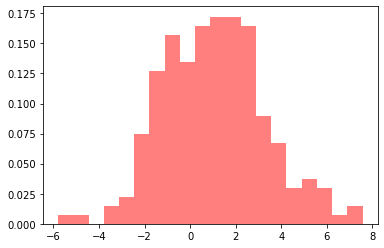

In [106]:
_=plt.hist(data, bins=20, alpha=0.5,density=True,color="red")

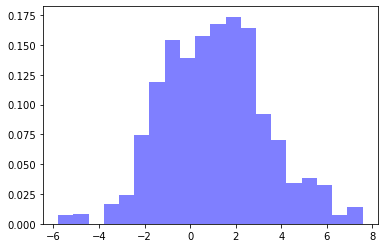

In [107]:
_ = plt.hist(sim_data, bins=20, alpha=0.5,density=True,color="blue")

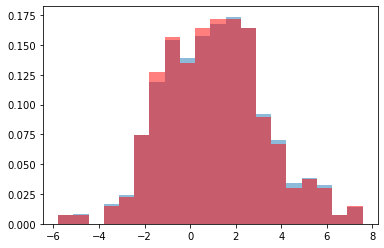

In [108]:
_ = plt.hist(sim_data, bins=20, alpha=0.5,density=True)
_=plt.hist(data, bins=20, alpha=0.5,density=True,color="red")

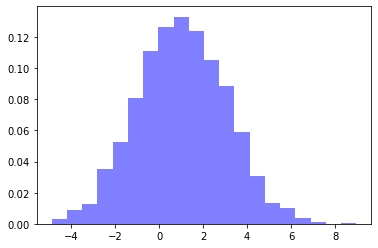

In [92]:
# define histgram with percentage, so two distribution can be shown in one chart
def pltHistPernt(x, color='blue',alpha=0.2):
    plt.hist(x, bins=20, alpha=alpha, color=color, weights=np.ones(len(x)) / len(x))

sim_idx=np.random.randint(0,n, size=int(n*1000))
sim_data=data[sim_idx]

pltHistPernt(sim_data, 'blue',alpha=0.5)

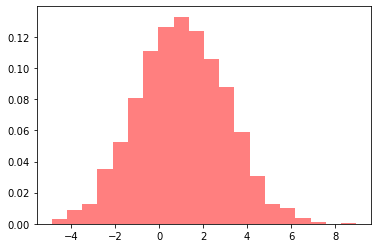

In [93]:
pltHistPernt(data, 'red',alpha=0.5)

Above experiment should not be suprise, but it is the foundation of bootstrapping method. 

<h1>Bootstrapping</h1>

The basic idea of the bootstrapping method is that, in absence of any other information about the distribution, the observed sample contains all the available information about the underlying distribution. and hence resampling the sample is the best guide to what can be expected from resampling from the distribution.

Suppose that a sample $X = (X_1,\cdots,X_n)^\top$ is used to estimate a parameter $\theta$ of the distribution and let $\hat{\theta}= s(X)$ be a statistic that estimates $\theta.$ For the purpose of statistical inference on $\theta$, we are interested in the sampling distribution of $\hat{\theta}$ so as to assess the accuracy of our estimator or to set confidence intervals for our estimate of $\theta.$

Suppose that
- $X = (X_1,\cdots,X_n)^\top$ is a random sample from a distribution $P$.
- $\theta = t(P)$ is some parameter of the distribution,
- $\hat{\theta}= s(X)$ is an estimator for $\theta$.

The bootstrapping method mimics the data-generating process by sampling from an estimate $\hat{P}$ of the unknown distribution $P$. Thus in the “bootstrap world”, we have:
- $X^* = (X_1^*,\cdots,X_n^*)^\top$ is a bootstrap sample from,
- $\theta^* = t(\hat{P})$ is the parameter in the bootstrap world,
- $\hat{\theta}^*= s(X^*)$ is the bootstrap replication of

The bootstrap principle can be summarized by the following schematic diagram:

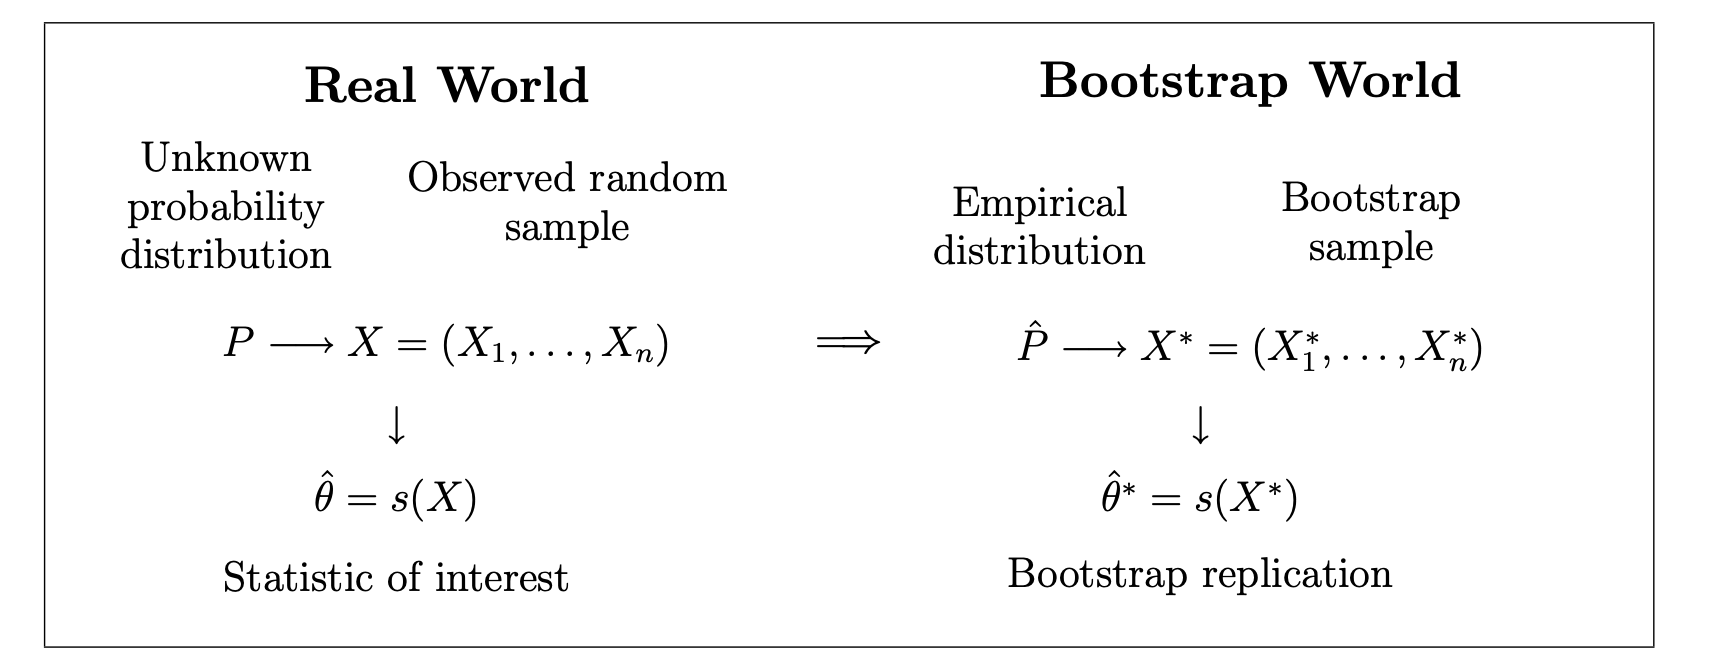

Use bootstrap to get Confidence Intervals for parameter $\theta$ (what is confidence intervals?):

- Draw $B$ independent bootstrap samples $X^{*(1)},\cdots,X^{*(B)}$ from $\hat{P}$:
\begin{equation}
   X^{*(b)} = (X_1^{*(b)},\cdots,X_n^{*(b)})^\top, ~and~ X_1^{*(1)},\cdots,X_n^{*(B)} \overset{i.i.d.}{\sim}\hat{P}
\end{equation}
- Evaluate the bootstrap replications
\begin{equation}
 \hat{\theta}^{*(b)}= s(X^{*(b)}),~b = 1,\cdots,B.
\end{equation}
- Rank $\hat{\theta}^{*(1)},\cdots,\hat{\theta}^{*(B)}$ and find $\hat{\theta}_L$ and $\hat{\theta}_U$ such that
\begin{equation}
\begin{aligned}
 \frac{1}{B}\sum_{b=1}^{B}1(\hat{\theta}^{*(b)}\ge\hat{\theta}_L)\approx\frac{\alpha}{2},
 \frac{1}{B}\sum_{b=1}^{B}1(\hat{\theta}^{*(b)}\le\hat{\theta}_U)\approx\frac{\alpha}{2}
 \end{aligned}
\end{equation}
- The $(1 − \alpha)$ confidence interval of $\theta$ is $[\hat{\theta}_L,\hat{\theta}_U]$.

In [110]:
n = 1000
mu = 1.0
sigma = 2.0
data = np.random.normal(mu,sigma,size=n)
index = np.random.randint(0,n,size=n)
#print(index)
dataBoot = data[index]
x_bar_boot = dataBoot.mean()

In [112]:
B = 2000
n = 1000
mu = 1.0
sigma = 5.0
alpha = 0.05
temp = ConfNormal(n,mu=mu,sigma=sigma)
t_int = temp.confInterval(alpha=alpha)
data = temp.data
len(data)

1000

In [47]:
B = 2000
n = 10000
mu = 1.0
sigma = 5.0
alpha = 0.05
temp = ConfNormal(n,mu=mu,sigma=sigma)
t_CI = temp.confInterval(alpha=alpha)
data = temp.data

res = []
for b in range(B):
    #index = np.random.randint(0,n,size=n)
    dataBoot =  np.random.choice(data,size=n) # data[index] # or
    res.append(dataBoot.mean())
res.sort()
low_index = int(B*alpha/2)
lower = res[low_index] #上面的不等号反了
upper = res[B-low_index]
boot_CI = [lower,upper]
print("theoretical CI:",t_CI,t_CI[1]-t_CI[0])
print("bootstrap CI:",boot_CI,boot_CI[1]-boot_CI[0])

theoretical CI: [0.8694705410962823, 1.0636027665351204] 0.19413222543883812
bootstrap CI: [0.8643404203051498, 1.0666340291832062] 0.20229360887805636


In [128]:
boot_sd = np.std(np.array(res))
[data.mean()-1.96*boot_sd,data.mean()+1.96*boot_sd]

[0.8927358197073744, 1.0848132658515421]

<h4>Confidence Interval of some Statistics</h4>

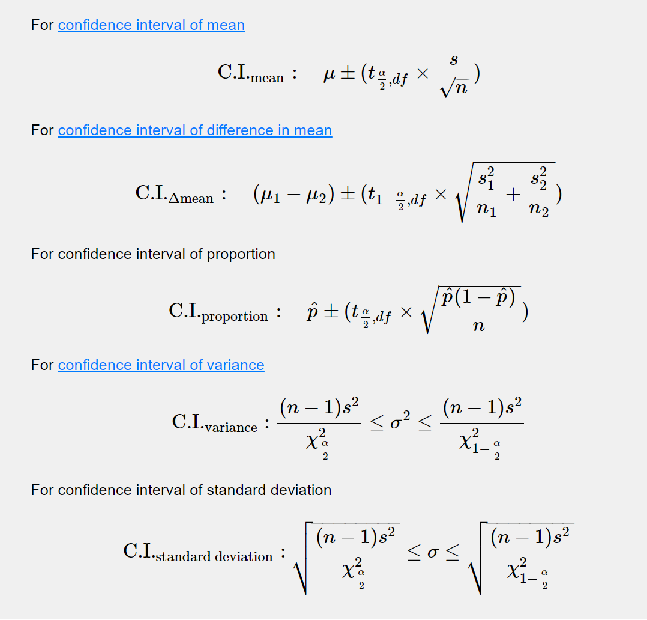


(71.33139551903422, 75.19543685256606)


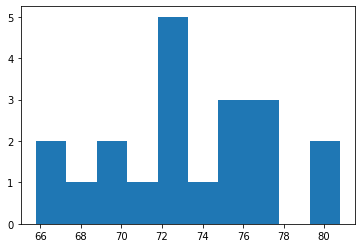

(73.99516629418433, 74.36800696994068)


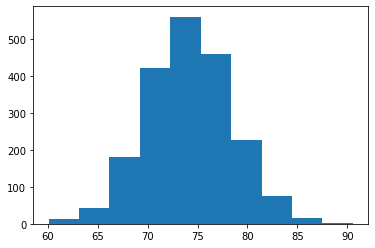

In [129]:
# using the analytical approach 
np.random.seed(42)

def confidenceLevelOfMean(arr):
    alpha = 0.05                       # significance level = 5%
    df = len(arr) - 1                  # degress of freedom = 20
    t = stats.t.ppf(1 - alpha/2, df)   # t-critical value for 95% CI = 2.093
    s = np.std(arr, ddof=1)            # sample standard deviation = 2.502
    n = len(arr)

    lower = np.mean(arr) - (t * s / np.sqrt(n))
    upper = np.mean(arr) + (t * s / np.sqrt(n))
    return lower, upper

arr = np.random.normal(loc=74, scale=4.3, size=20)  
print(confidenceLevelOfMean(arr))
plt.hist(arr)
plt.show()

pop = np.random.normal(loc=74, scale=4.3, size=2000)  
print(confidenceLevelOfMean(pop))
plt.hist(pop)
plt.show()

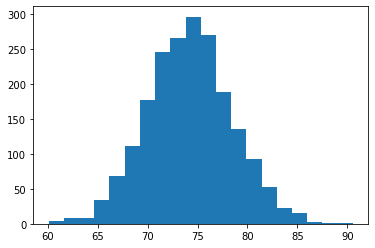

In [65]:
_=plt.hist(pop, bins=20)

small sample (49.72903613189628, 50.211124513794715)


Text(0.5, 1.0, 'distribution of mean() over small sample')

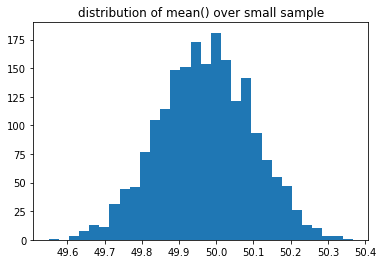

In [130]:
def bootstrap(data, func, B=1000):
    array = np.array(data, dtype=np.float64)
    n = len(array)
    sample_result = [func(array[np.random.randint(0, n, size=n)]) 
                     for b in range(B)]
    return sample_result

def getTails(distribution, lvl=0.95):
    length=len(distribution)
    k1 = int(length*(1-lvl)/2) 
    distribution_sorted = sorted(distribution)
    lower = distribution_sorted[k1]
    upper = distribution_sorted[length-k1]

    return lower, upper

def boost_conf(data, func, nRepeats=2000, clvl=0.95):
    result_dist=bootstrap(data, func, nRepeats)
    return getTails(result_dist, clvl), result_dist

data = np.random.normal(loc=50, scale=5.5, size=2000)
boostrapped=bootstrap(data, np.mean, B=2000)
result1=getTails(boostrapped, 0.95)
print('small sample', result1)
_=plt.hist(boostrapped, bins=30)
plt.title('distribution of mean() over small sample')

population (49.736156279647, 50.21838945068725)


Text(0.5, 1.0, 'distribution of mean() over population')

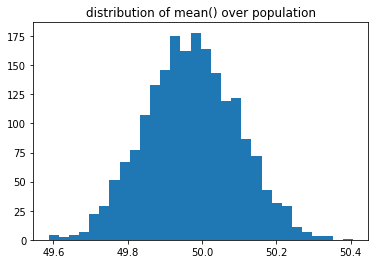

In [131]:
result2= boost_conf(data, np.mean, 2000, 0.95)
print('population', result2[0])
_=plt.hist(result2[1], bins=30)
plt.title('distribution of mean() over population')

population (49.65545587019242, 50.30327336959117)


Text(0.5, 1.0, 'distribution of median() over population')

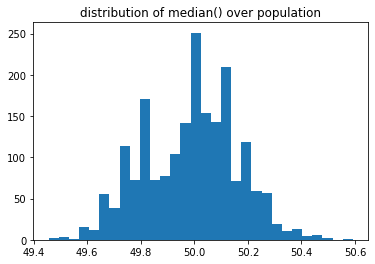

In [132]:
result3= boost_conf(data, np.median, 2000, 0.95)
print('population', result3[0])
_=plt.hist(result3[1], bins=30)
plt.title('distribution of median() over population')

population (-18.23482700687314, -15.542113715121557)


Text(0.5, 1.0, 'distribution of quantiles over population')

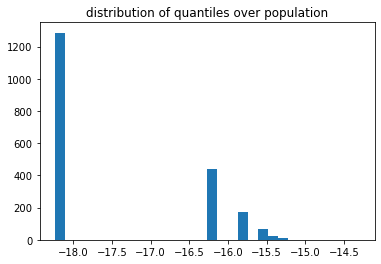

In [138]:
# get quantiles
result3= boost_conf(data, lambda x: np.quantile(x,q=0.00000025), 2000, 0.95)
print('population', result3[0])
_=plt.hist(result3[1], bins=30)
plt.title('distribution of quantiles over population')

The above example shows the power of bootstrapping. Bootstrapping allows you to avoid these practical concerns, such as the lack of formulas to compute the confidence interval of covariance and median. In regression analysis, even though the regression coefficient has its own formula for its confidence interval, but the formulas get really messy in cases of multi-linear or non-linear regression. Wouldn't it be nice if there's a "magic" that saves you from all the math you have to worry about?

User of boostrapping may wonder why resampling the same sample over and over gives good results? If we are resampling from our sample, how is it that we are learning something about the population rather than only about the sample? The idea comes from the assumption that the sample is a reasonable representation of its underlying population — the population is to the sample as the sample is to the bootstrap samples.

<h3>Assumptions and Limitations of Bootstrap</h3>

Bootstrapping is great because it saves you from the normality assumption of distributions and all the math you have to know to construct confidence intervals. However, just like many other techniques, bootstrap has its own caveats. While bootstrap is distribution-free, it is not assumption-free. The assumptions are listed in this section.

Please note that there is a humongous variety of the bootstrap procedures, each addressing the particular quirk in either the statistic, the sample size, the dependence, or whatever an issue with the bootstrap could be. I am not introducing all of them here as the in-depth technical discussion of bootstrap needs another devoted post, but I still want you to know some of the critical assumptions; I want you to know what you don't know, so that you can search it online later to learn in-depth.

<ul>
    <li>A sample is a good representation of its underlying population.  If the original sample is biased, the resulting bootstrap samples will also be biased. However, this is a problem of not just bootstrapping, but all statistical techniques.
     <li>Insufficient samples make the bootstrap C.I. to be narrower than the analytical C.I. If you have too small sample, by a high chance it is not diverse enough to represent all (reasonably) possible aspects of its population. Therefore, it is not a good representation of its population. Second, small sample size makes its bootstrap C.I. to be narrower than the analytical C.I.
   <li>Bootstrap fails to estimate extreme quantiles. This has the root on the random number generating. For example, the range of 100 million drawing from normal (0,1) distribution is within [-5.421120914993705, 5.496999875144767]
       
   <li>Bootstrap iteration should be sufficient to reproduce consistent C.I's.
   <li>Samples are independent and identically distributed. This may not fit the time series or any drawing with 'trend'.
   <li>Bootstrap is not robust in heavy-tailed distributions